In [2]:
import xml.etree.ElementTree as tree
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns

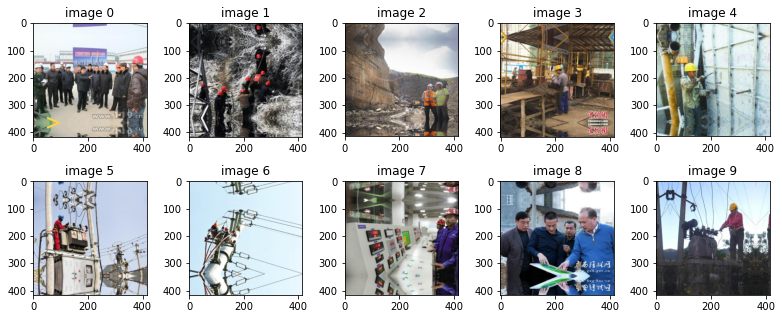

In [3]:
img=[]
for i in range(11):
    path = "hard_hat_workers"+str(i)
    imgS = cv2.imread("D:/19cse304/archive/images/"+path+".png")
    img.append(imgS)
plt.figure(figsize=(11,11))
for i in range(1,11):
    plt.subplot(5,5,i)
    plt.tight_layout()
    img[i-1] = cv2.cvtColor(img[i-1], cv2.COLOR_BGR2RGB)
    plt.imshow(img[i-1])
    plt.title("image "+str(i-1))
plt.show()
    

In [4]:
image1=np.array(img[0])
image1


array([[[241, 247, 247],
        [241, 247, 247],
        [241, 247, 247],
        ...,
        [228, 227, 233],
        [178, 177, 183],
        [164, 163, 169]],

       [[241, 247, 247],
        [241, 247, 247],
        [241, 247, 247],
        ...,
        [230, 229, 235],
        [184, 183, 188],
        [163, 162, 168]],

       [[241, 247, 247],
        [241, 247, 247],
        [241, 247, 247],
        ...,
        [220, 221, 225],
        [180, 181, 183],
        [164, 165, 169]],

       ...,

       [[ 85,  89,  75],
        [ 81,  85,  71],
        [ 80,  82,  69],
        ...,
        [203, 196, 178],
        [206, 198, 178],
        [205, 194, 175]],

       [[ 84,  90,  78],
        [ 84,  87,  76],
        [ 82,  84,  71],
        ...,
        [205, 200, 181],
        [208, 201, 181],
        [205, 197, 176]],

       [[ 83,  89,  77],
        [ 83,  86,  75],
        [ 82,  86,  72],
        ...,
        [207, 202, 183],
        [210, 204, 182],
        [206, 198, 177]]

In [5]:
image1.shape

(416, 416, 3)

In [6]:
image1.size

519168

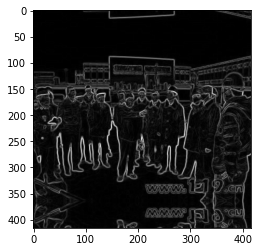

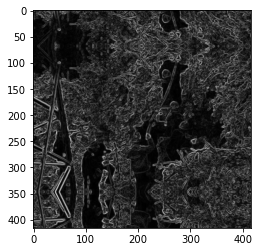

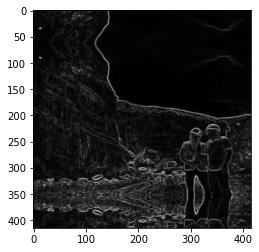

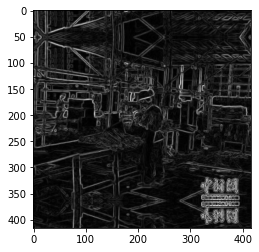

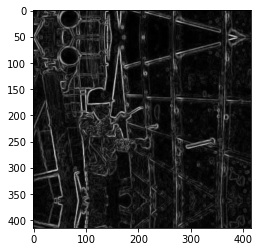

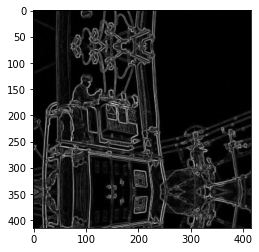

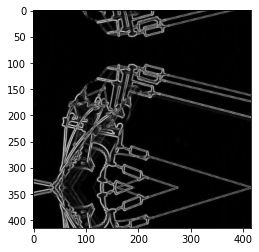

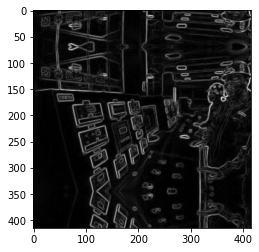

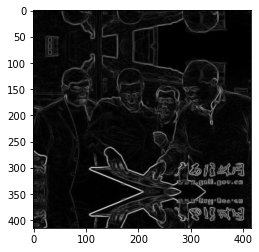

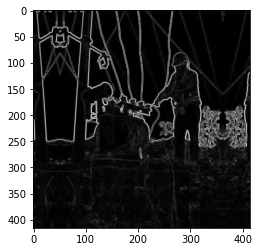

In [7]:
#edge detection
from skimage.color import rgb2gray
from skimage import filters
for i in range(1,11):
    grayscale=rgb2gray(img[i-1])
    ed_sobel=filters.sobel(grayscale)
    plt.imshow(ed_sobel,cmap='gray')
    plt.show()

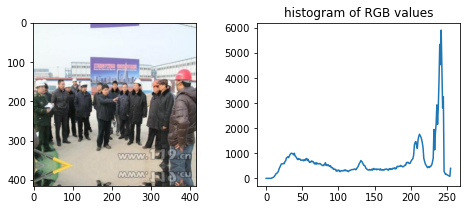

In [8]:
histr=cv2.calcHist([img[0]],[0],None,[256],[0,256])
fig,axes=plt.subplots(1,2,figsize=(8,3))
axes[0].imshow(img[0])
imgS=img[0]
histr=cv2.calcHist([imgS],[0],None,[256],[0,256])
axes[1].plot(histr)
axes[1].set_title('histogram of RGB values')
plt.show()

In [9]:
def getBboxes(path):
    file = tree.parse(path)
    root = file.getroot()
    bboxes = []
    for helmet in root.iter("object"):
        bbox = []
        for point in helmet[5]:
            bbox.append(int(point.text))

        bboxes.append([bbox,helmet[0].text])
    return bboxes



In [10]:
def preprocess(img):
    img = img/255.0
    img = cv2.resize(img,(128,128))
    return img

In [11]:
images = []
images_1=[]
labels = []
for i in range(300):
    path = "hard_hat_workers"+str(i)
    bboxes = getBboxes("D:/19cse304/archive/annotations/"+path+".xml")
    img = cv2.imread("D:/19cse304/archive/images/"+path+".png")
    j=0
    for helmet in bboxes:
        image = img[helmet[0][1]:helmet[0][3],helmet[0][0]:helmet[0][2]]
        label = helmet[1]
        image = preprocess(image)
        images.append(image.flatten())
        images_1.append(image)
        labels.append(label)
labels = np.array(labels)
images = np.array(images)
images_1 = np.array(images_1)

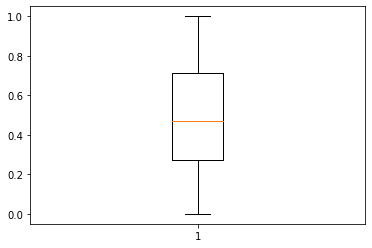

In [12]:
plt.boxplot(images.flatten())
plt.show()


In [13]:
from scipy import stats
stats.zscore(images.flatten())

array([ 1.40808603,  1.42259947,  1.39357258, ..., -0.98663197,
       -0.49317493, -0.73990345])

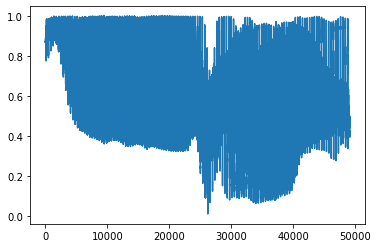

In [14]:
plt.plot(images[0])
plt.show()

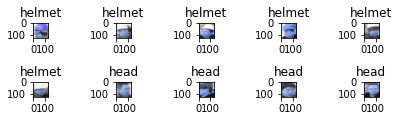

In [15]:
for i in range(1,11):
    plt.subplot(5,5,i)
    plt.tight_layout()
    plt.imshow(images_1[i-1])
    plt.title(""+labels[i-1])
plt.show()

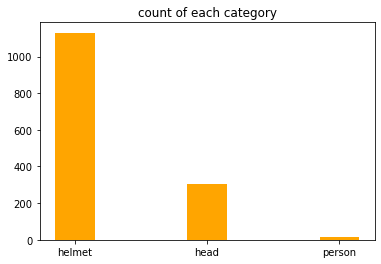

In [16]:
arr=[]
for i in labels:
    flag=0
    for j in arr:
        if(j==i):
            flag=1
            break
    if(flag==0):
        arr.append(i)
helmet=0
head=0
person=0
for i in labels:
    if(i=='helmet'):
        helmet+=1
    elif(i=='head'):
        head+=1
    else:
        person+=1
x=np.array(["helmet","head","person"])
y=np.array([helmet,head,person])
plt.bar(x,y,color='orange',width=0.3)
plt.title("count of each category")
plt.show()

In [17]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)


In [18]:
print(len(images))
print(len(labels))

1448
1448


In [115]:
from sklearn.model_selection import train_test_split

x_train,x_temp,y_train,y_temp = train_test_split(images,labels,test_size=0.2)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))

96
12
13


In [20]:
iris_data = np.array(x_train)
iris_target = np.array(y_train)
print(len(iris_data))
print(len(iris_target))

1158
1158


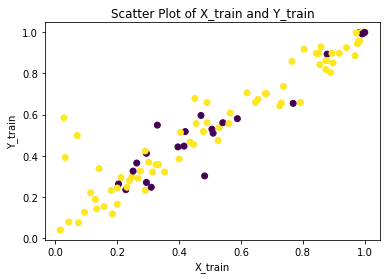

In [21]:
iris_data   = iris_data[0:100]
iris_target = iris_target[0:100] 
plt.scatter(iris_data[:,0],iris_data[:,1], c=iris_target)
plt.xlabel("X_train")
plt.ylabel("Y_train")
plt.title("Scatter Plot of X_train and Y_train")
plt.show()

In [22]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,np.array(y_train))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print("model coefficient")
print(model.coef_ )
print(model.coef_.shape)
print("model intercept")
print(model.intercept_)
print(model.intercept_.shape)

model coefficient
[[-0.03608139 -0.06702206 -0.0900044  ...  0.00955774 -0.004817
  -0.01208264]
 [ 0.03366725  0.05730905  0.07830286 ... -0.03044145 -0.01805558
  -0.00911498]
 [ 0.00241414  0.009713    0.01170154 ...  0.02088371  0.02287258
   0.02119762]]
(3, 49152)
model intercept
[ 0.38037157 -0.33805799 -0.04231358]
(3,)


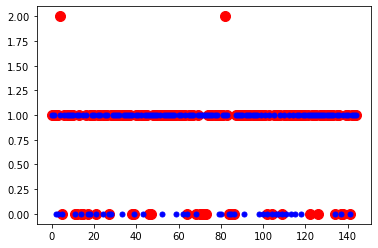

In [24]:
predictions_val=model.predict(x_val)
plt.plot(y_val,marker='o',ms=10,mec='r',mfc='r',color="none")
plt.plot(predictions_val,marker='o',ms=5,mec='b',mfc='b',color="none")
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,predictions_val)

0.7586206896551724

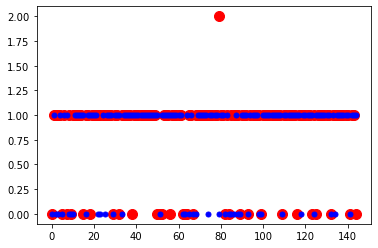

In [26]:
predictions_test=model.predict(x_test)
plt.plot(y_test,marker='o',ms=10,mec='r',mfc='r',color="none")
plt.plot(predictions_test,marker='o',ms=5,mec='b',mfc='b',color="none")
plt.show()

In [27]:
accuracy_score(y_test,predictions_test)

0.7724137931034483

145


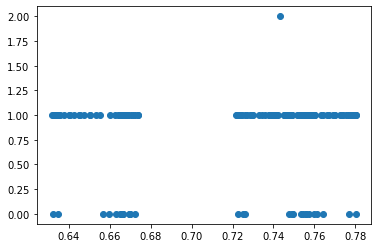

In [28]:
r=x_test.flatten()
print(len(y_test))
plt.scatter(r[:len(y_test)],y_test)
plt.show()

0.7724137931034483

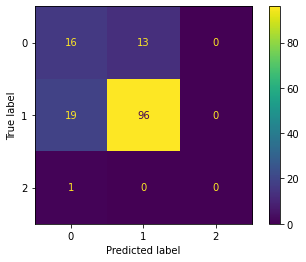

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions_test)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, predictions_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier(max_depth=20,random_state=42)
clf = clf.fit(x_val,y_val)

In [32]:
print(x_val.shape)
x_val = x_val.flatten()
print(x_val.shape)
print(x_val)

(145, 49152)
(7127040,)
[0.03137255 0.02352941 0.04705882 ... 0.96078431 0.98039216 0.98431373]


In [33]:
from sklearn import tree
text_representation=tree.export_text(clf)
print(text_representation)

|--- feature_10634 <= 0.34
|   |--- feature_10836 <= 0.55
|   |   |--- feature_13476 <= 0.06
|   |   |   |--- class: 1
|   |   |--- feature_13476 >  0.06
|   |   |   |--- class: 0
|   |--- feature_10836 >  0.55
|   |   |--- class: 1
|--- feature_10634 >  0.34
|   |--- feature_33373 <= 0.87
|   |   |--- feature_25583 <= 0.17
|   |   |   |--- feature_3190 <= 0.68
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3190 >  0.68
|   |   |   |   |--- feature_35581 <= 0.28
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_35581 >  0.28
|   |   |   |   |   |--- class: 1
|   |   |--- feature_25583 >  0.17
|   |   |   |--- feature_5687 <= 1.00
|   |   |   |   |--- feature_33032 <= 0.99
|   |   |   |   |   |--- feature_7157 <= 0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7157 >  0.21
|   |   |   |   |   |   |--- feature_22884 <= 0.61
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_22884 >  0.61
|   |   |   |   |   |   

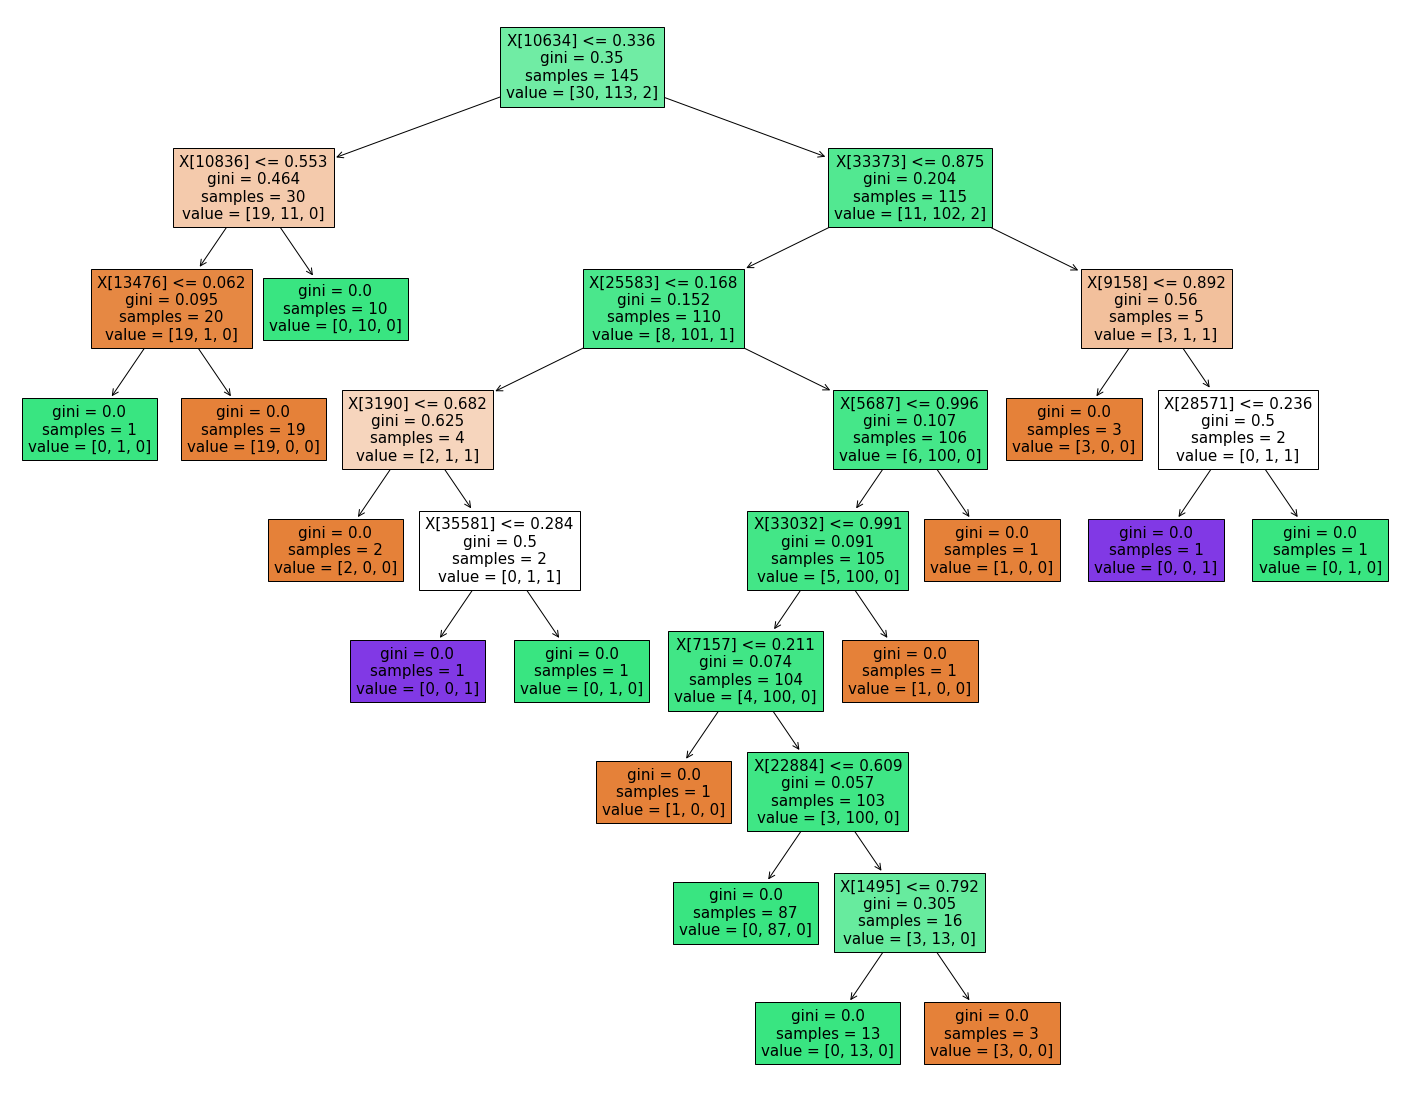

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

0.6827586206896552

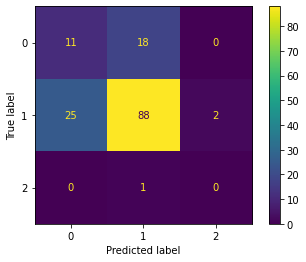

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, y_pred)

In [36]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train,np.array(y_train)) 

GaussianNB()

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0], dtype=int64)

In [39]:
y_test

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

0.6689655172413793

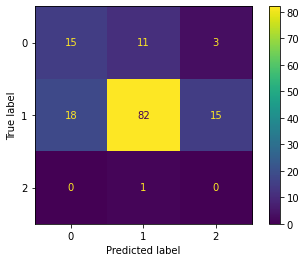

In [40]:
cm = confusion_matrix(y_test, y_pred)  
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, y_pred)

In [41]:
import xml.etree.ElementTree as tree
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns

In [48]:
def getBboxes(path):
    file = tree.parse(path)
    root = file.getroot()
    bboxes = []
    for helmet in root.iter("object"):
        bbox = []
        for point in helmet[5]:
            bbox.append(int(point.text))

        bboxes.append([bbox,helmet[0].text])
    return bboxes



In [49]:
def preprocess(img):
    img = img/255.0
    img = cv2.resize(img,(128,128))
    return img



In [50]:
images = []
images_1=[]
labels = []
for i in range(30):
    path = "hard_hat_workers"+str(i)
    bboxes = getBboxes("D:/19cse304/archive/annotations/"+path+".xml")
    img = cv2.imread("D:/19cse304/archive/images/"+path+".png")
    j=0
    for helmet in bboxes:
        image = img[helmet[0][1]:helmet[0][3],helmet[0][0]:helmet[0][2]]
        label = helmet[1]
        image = preprocess(image)
        images.append(image.flatten())
        images_1.append(image)
        labels.append(label)
labels = np.array(labels)
images = np.array(images)
images_1 = np.array(images_1)

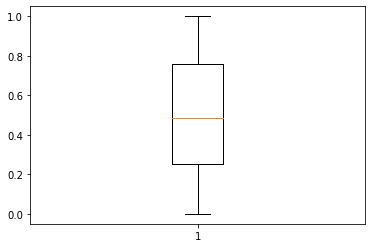

In [51]:
plt.boxplot(images.flatten())
plt.show()


In [52]:
from scipy import stats
stats.zscore(images.flatten())

array([ 1.28641688,  1.30003035,  1.27280341, ..., -0.02047644,
        0.85078578,  1.40893813])

In [56]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)


In [57]:
print(len(images))
print(len(labels))


121
121


In [58]:
from sklearn.model_selection import train_test_split

x_train,x_temp,y_train,y_temp = train_test_split(images,labels,test_size=0.2)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5)
print(len(x_train))
print(len(x_val))
print(len(x_test))

96
12
13


In [59]:
iris_data = np.array(x_train)
iris_target = np.array(y_train)
print(len(iris_data))
print(len(iris_target))

96
96


In [61]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train,np.array(y_train))

RandomForestRegressor(random_state=0)

In [62]:
y_pred = regressor.predict(x_val)
y_pred

array([1.  , 0.83, 0.81, 0.85, 1.  , 0.84, 0.96, 0.75, 1.  , 0.81, 0.89,
       0.92])

In [63]:
y_val

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

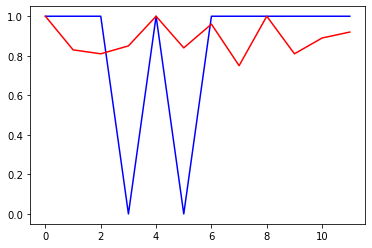

In [64]:
plt.plot(np.array(y_val), color = 'blue') 
plt.plot(y_pred,color='red')
plt.show()

In [65]:
#svm

In [66]:
from sklearn.svm import SVC

In [67]:
model = SVC()

In [68]:
model.fit(x_train, y_train)

SVC()

In [69]:
predicted = model.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [71]:
cm = confusion_matrix(y_test, predicted)

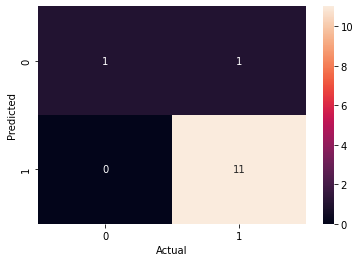

In [72]:
import seaborn as sns
sns.heatmap(cm, annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [73]:
print("Accuracy score : ",accuracy_score(y_test, predicted) *100, "%")

Accuracy score :  92.3076923076923 %


In [74]:
#knn

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(x_train, y_train)

KNeighborsClassifier()

In [76]:
y_pred = knn5.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Predicted values with k=5')

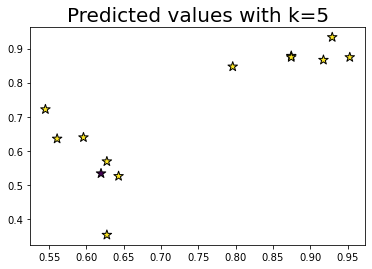

In [77]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)


0.9230769230769231

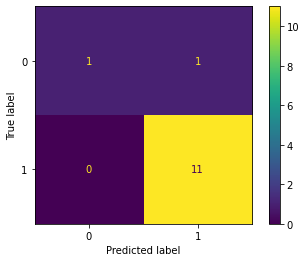

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, y_pred)

In [79]:
#clustering

In [80]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [81]:
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)

In [82]:
kmeans.fit(x_train)

KMeans(init='random', n_clusters=2, random_state=42)

In [83]:
y_pred = kmeans.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

0.7692307692307693

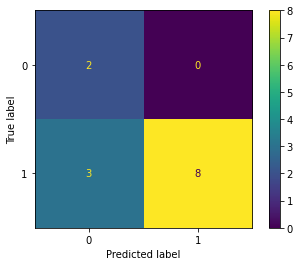

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, y_pred)

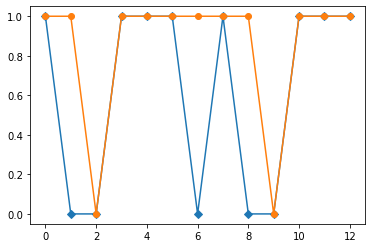

In [85]:
plt.plot(y_pred,marker='D')
plt.plot(y_test,marker='o')
plt.show()



In [86]:
import matplotlib.pyplot as plt

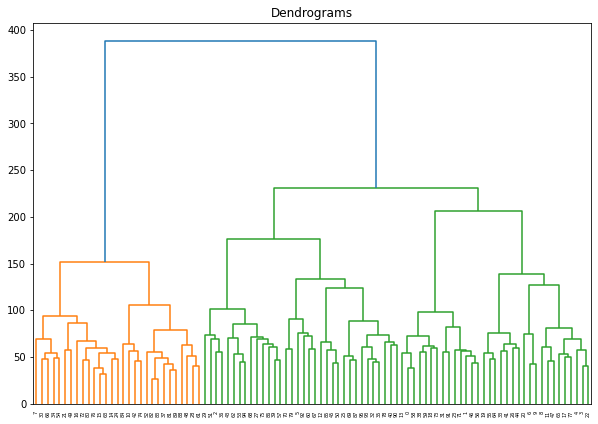

In [87]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_train, method='ward'))

In [88]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')  
y_pred=cluster.fit_predict(x_test)

0.07692307692307693

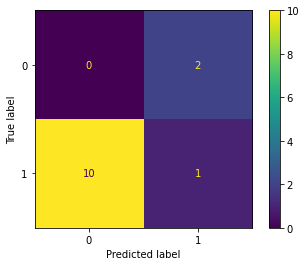

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, y_pred)

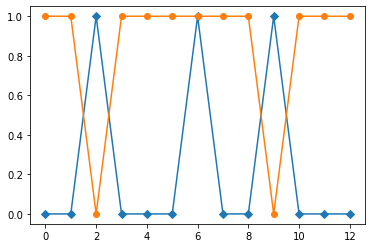

In [90]:
plt.plot(y_pred,marker='D')
plt.plot(y_test,marker='o')
plt.show()

In [91]:
#perceptron

In [92]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train, y_train)

Perceptron(eta0=0.1, random_state=1)

In [93]:
y_pred = ppn.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [94]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

1.0

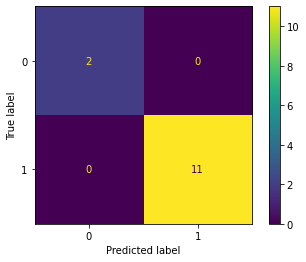

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, y_pred)

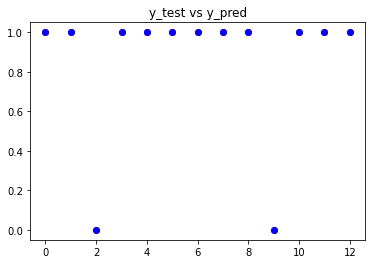

In [96]:
plt.plot(y_test,color="red",marker='o',linewidth='0')
plt.plot(y_pred,color="blue",marker='o',linewidth='0')
plt.title('y_test vs y_pred')
plt.show()

In [97]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(x_test, y_test))

Accuracy: 1.000
Accuracy: 1.000


In [98]:
#pca with kmeans

In [112]:
from sklearn.decomposition import PCA

In [122]:
principal=PCA(n_components=3)
principal.fit(x_train)
x=principal.transform(x_train)

In [123]:
x.shape

(96, 3)

In [124]:
principal.components_


array([[-0.00567963, -0.00606112, -0.00593016, ..., -0.00497374,
        -0.00478641, -0.00485719],
       [ 0.0056258 ,  0.00361147,  0.00234792, ...,  0.00182773,
         0.00131515,  0.00146549],
       [ 0.00113327,  0.00029762, -0.00075109, ...,  0.0053719 ,
         0.00375737,  0.00233908]])

Text(0, 0.5, 'pc2')

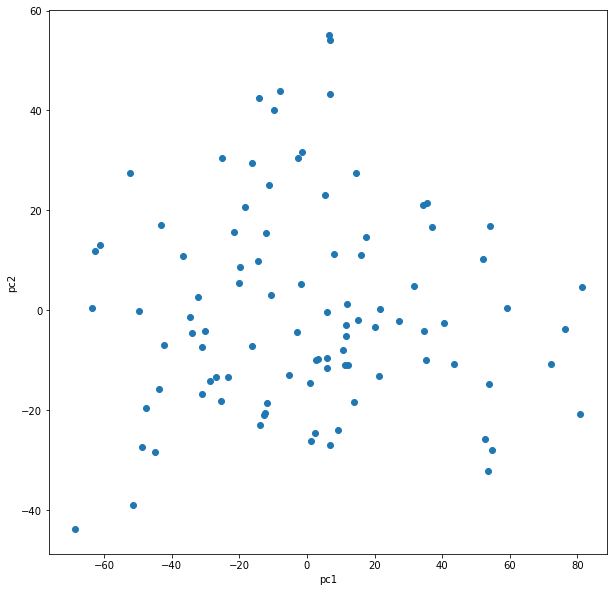

In [125]:

plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

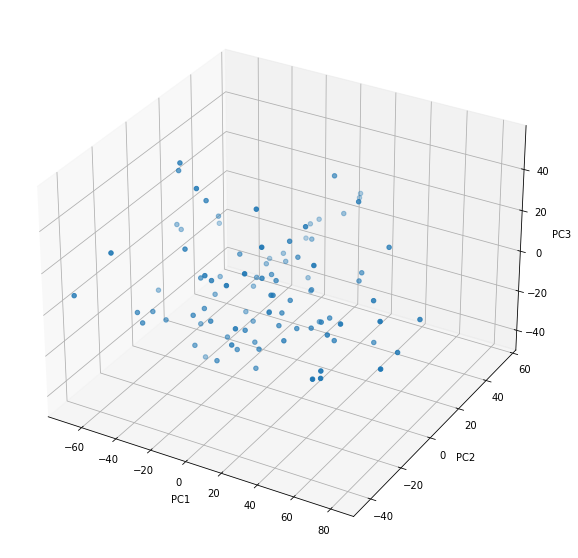

In [126]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x[:,0],x[:,1],x[:,2],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [105]:
print(principal.explained_variance_ratio_)

[0.34276276 0.12245777 0.0837736 ]


In [106]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [107]:
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)

In [108]:
kmeans.fit(x)

KMeans(init='random', n_clusters=2, random_state=42)

In [109]:
y_pred = kmeans.predict(x)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1])

0.5729166666666666

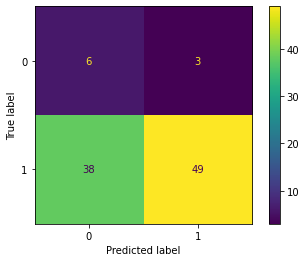

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_train, y_pred)